In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv',encoding=('ISO-8859-1'))

In [5]:
df.sample(5)

v1                                                 v2 Unnamed: 2  \
4320  ham  K, jason says he's gonna be around so I'll be ...        NaN   
4191  ham              &lt;#&gt;  w jetton ave if you forgot        NaN   
3366  ham            Hey what are you doing. Y no reply pa..        NaN   
941   ham  Theyre doing it to lots of places. Only hospit...        NaN   
360   ham             Ha ha cool cool chikku chikku:-):-DB-)        NaN   

     Unnamed: 3 Unnamed: 4  
4320        NaN        NaN  
4191        NaN        NaN  
3366        NaN        NaN  
941         NaN        NaN  
360         NaN        NaN

In [6]:
df.shape

(5572, 5)

In [7]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

1.Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

v1                                                 v2
845   ham  Meanwhile in the shit suite: xavier decided to...
5306  ham  Ill be at yours in about 3 mins but look out f...
2931  ham  Only 2% students solved this CAT question in '...
2033  ham                            IM GONNA MISS U SO MUCH
1289  ham  Hey...Great deal...Farm tour 9am to 5pm $95/pa...

In [11]:

# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

target                                               text
1501   spam  HOT LIVE FANTASIES call now 08707509020 Just 2...
336     ham  Cool. So how come you havent been wined and di...
1680    ham                                 Okay... We wait ah
271     ham  Night has ended for another day, morning has c...
1582    ham    Yep, at derek's house now, see you Sunday &lt;3

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:

df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

2.EDA

In [20]:

df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [21]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

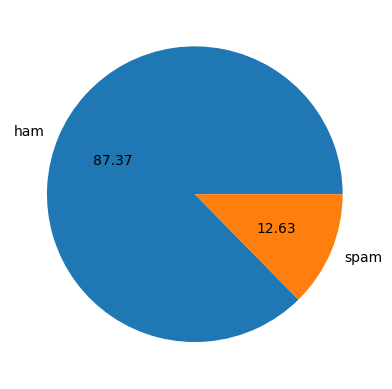

In [22]:

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
# Data is imbalanced

In [24]:
!pip install nltk

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

target                                               text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [29]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [31]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [33]:
df[['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

In [34]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

In [35]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000

In [36]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

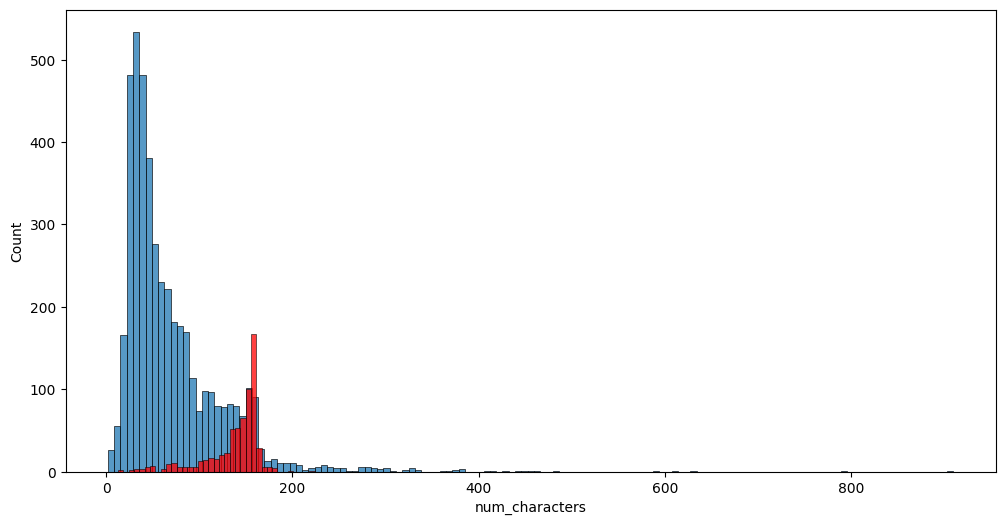

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

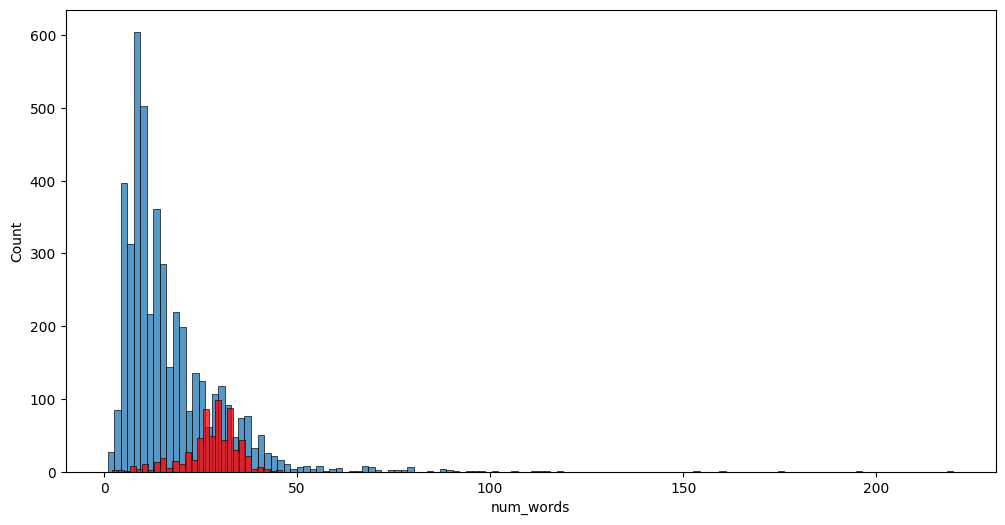

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

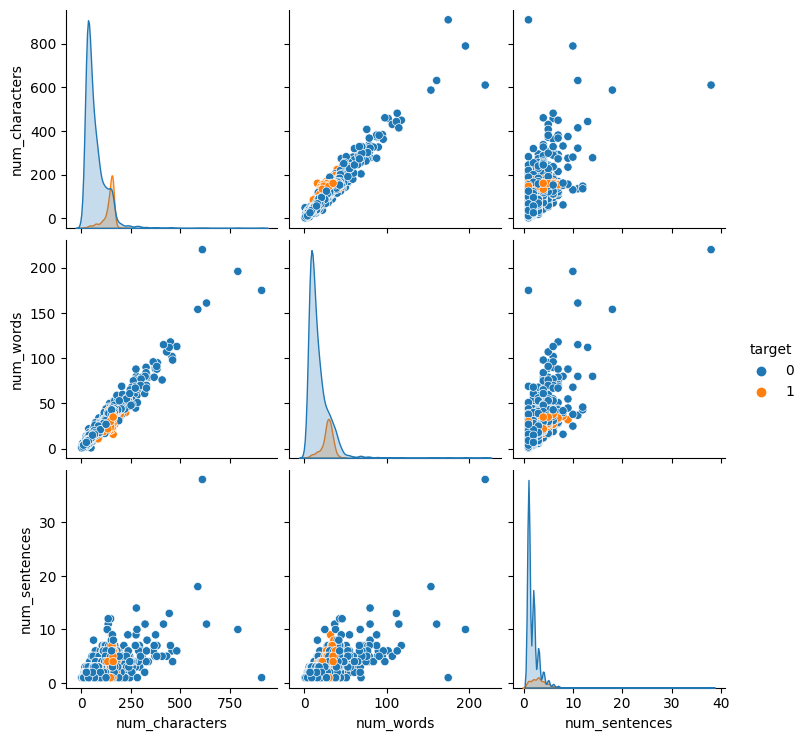

In [39]:
sns.pairplot(df,hue='target')

C:\Users\nikhi\AppData\Local\Temp\ipykernel_13292\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

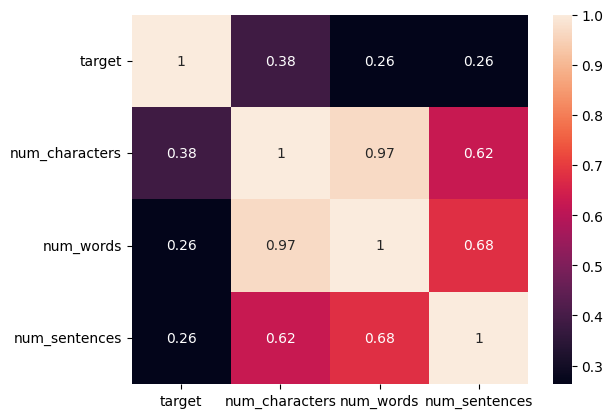

In [40]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [41]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
import string


In [43]:
from nltk.corpus import stopwords


In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [45]:
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [46]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [47]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [48]:
df['transformed_text'] = df['text'].apply(transform_text)

In [49]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [50]:
pip install wordcloud

In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [52]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

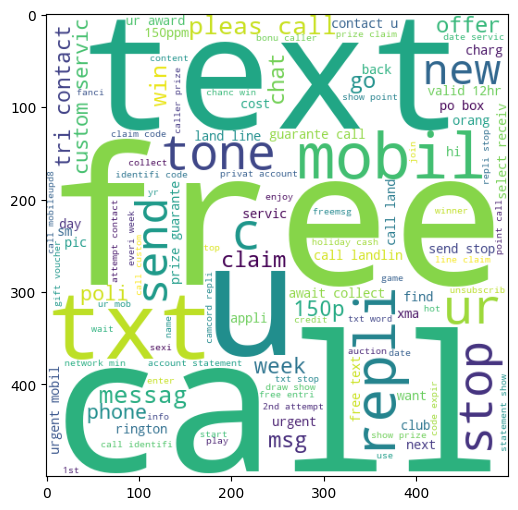

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(wc)

In [54]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

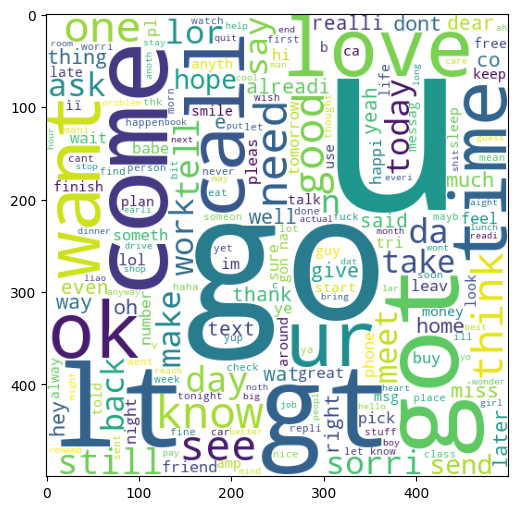

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [56]:

df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

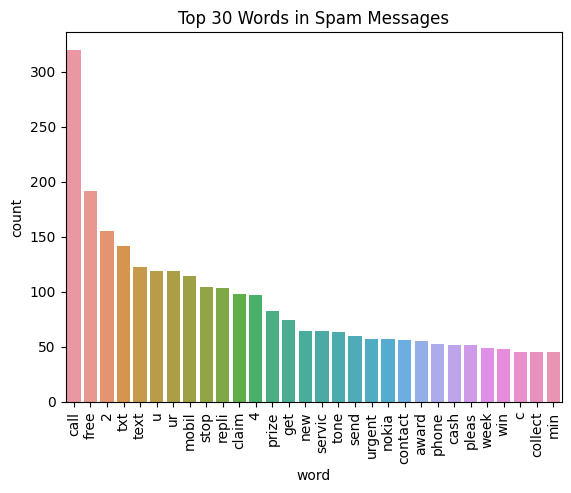

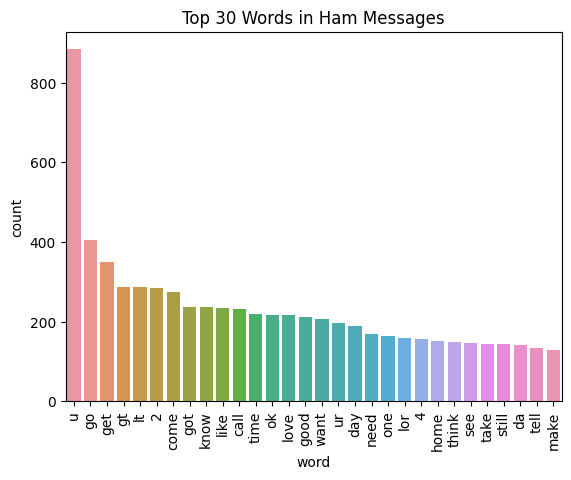

In [57]:
import seaborn as sns
import pandas as pd
from collections import Counter

# Assuming df is your DataFrame containing the SMS data

# Create separate corpora for spam and ham messages
spam_corpus = ' '.join(df[df['target'] == 1]['transformed_text']).split()
ham_corpus = ' '.join(df[df['target'] == 0]['transformed_text']).split()

# Create Counters for each corpus
spam_counter = Counter(spam_corpus)
ham_counter = Counter(ham_corpus)

# Convert Counters to DataFrames
df_spam = pd.DataFrame(spam_counter.most_common(30), columns=['word', 'count'])
df_ham = pd.DataFrame(ham_counter.most_common(30), columns=['word', 'count'])

# Plot for spam
sns.barplot(x='word', y='count', data=df_spam)
plt.title('Top 30 Words in Spam Messages')
plt.xticks(rotation=90)
plt.show()

# Plot for ham
sns.barplot(x='word', y='count', data=df_ham)
plt.title('Top 30 Words in Ham Messages')
plt.xticks(rotation=90)
plt.show()


In [58]:
len(ham_corpus)

35404

In [59]:
len(spam_corpus)

9939

In [60]:
#Text Verification
#Using Bag of Words
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

4. Model Building


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer()

In [62]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
X.shape

(5169, 6708)

In [64]:
y=df['target'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb =  MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [71]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [72]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [73]:
#tfidf-->MNB

In [74]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [78]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [79]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [80]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [81]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [82]:
performance_df

Algorithm  Accuracy  Precision
1         KN  0.900387   1.000000
2         NB  0.959381   1.000000
5         RF  0.971954   1.000000
8        ETC  0.972921   0.982456
0        SVC  0.972921   0.974138
6   AdaBoost  0.961315   0.945455
10       xgb  0.972921   0.943548
4         LR  0.951644   0.940000
9       GBDT  0.952611   0.923810
7        BgC  0.958414   0.862595
3         DT  0.936170   0.846154

In [83]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [84]:
performance_df1

Algorithm   variable     value
0         KN   Accuracy  0.900387
1         NB   Accuracy  0.959381
2         RF   Accuracy  0.971954
3        ETC   Accuracy  0.972921
4        SVC   Accuracy  0.972921
5   AdaBoost   Accuracy  0.961315
6        xgb   Accuracy  0.972921
7         LR   Accuracy  0.951644
8       GBDT   Accuracy  0.952611
9        BgC   Accuracy  0.958414
10        DT   Accuracy  0.936170
11        KN  Precision  1.000000
12        NB  Precision  1.000000
13        RF  Precision  1.000000
14       ETC  Precision  0.982456
15       SVC  Precision  0.974138
16  AdaBoost  Precision  0.945455
17       xgb  Precision  0.943548
18        LR  Precision  0.940000
19      GBDT  Precision  0.923810
20       BgC  Precision  0.862595
21        DT  Precision  0.846154

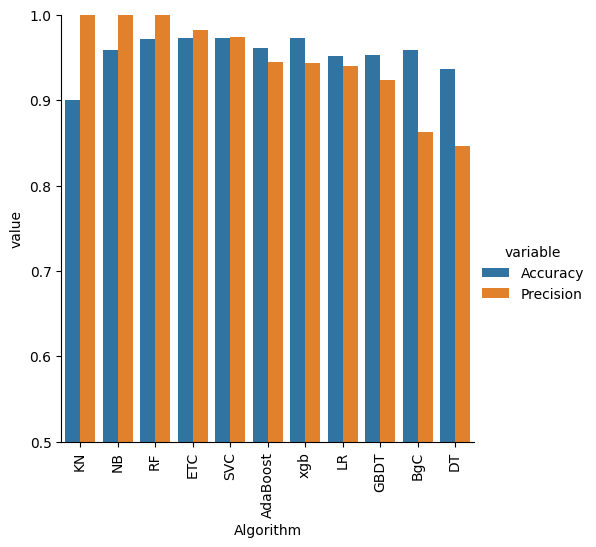

In [85]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [86]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [89]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [90]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [92]:
new_df_scaled.merge(temp_df,on='Algorithm')

Algorithm  Accuracy  Precision  Accuracy_scaling_x  Precision_scaling_x  \
0         KN  0.900387   1.000000            0.900387             1.000000   
1         NB  0.959381   1.000000            0.959381             1.000000   
2         RF  0.971954   1.000000            0.971954             1.000000   
3        ETC  0.972921   0.982456            0.972921             0.982456   
4        SVC  0.972921   0.974138            0.972921             0.974138   
5   AdaBoost  0.961315   0.945455            0.961315             0.945455   
6        xgb  0.972921   0.943548            0.972921             0.943548   
7         LR  0.951644   0.940000            0.951644             0.940000   
8       GBDT  0.952611   0.923810            0.952611             0.923810   
9        BgC  0.958414   0.862595            0.958414             0.862595   
10        DT  0.936170   0.846154            0.936170             0.846154   

    Accuracy_scaling_y  Precision_scaling_y  Accuracy_num_chars  \
0             0.900387             1.000000            0.900387   
1             0.959381             1.000000            0.959381   
2             0.971954             1.000000            0.971954   
3             0.972921             0.982456            0.972921   
4             0.972921             0.974138            0.972921   
5             0.961315             0.945455            0.961315   
6             0.972921             0.943548            0.972921   
7             0.951644             0.940000            0.951644   
8             0.952611             0.923810            0.952611   
9             0.958414             0.862595            0.958414   
10            0.936170             0.846154            0.936170   

    Precision_num_chars  
0              1.000000  
1              1.000000  
2              1.000000  
3              0.982456  
4              0.974138  
5              0.945455  
6              0.943548  
7              0.940000  
8              0.923810  
9              0.862595  
10             0.846154

In [93]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [94]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [95]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [96]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [97]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [98]:
from sklearn.ensemble import StackingClassifier

In [99]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [100]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Example NumPy arrays
X_train = np.array(["This is a sample sentence.",
                     "Another example sentence.",
                     "Yet another example for training."])
X_test = np.array(["This is a test sentence.",
                    "Another test example sentence."])

# Convert NumPy arrays to lists of strings
X_train_list = X_train.astype(str).tolist()
X_test_list = X_test.astype(str).tolist()

# Create a TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train_list)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test_list)

# Print the transformed data
print("X_train_tfidf:")
print(X_train_tfidf.toarray())
print("\nX_test_tfidf:")
print(X_test_tfidf.toarray())


X_train_tfidf:
[[0.         0.         0.         0.52863461 0.52863461 0.40204024
  0.52863461 0.         0.        ]
 [0.57735027 0.57735027 0.         0.         0.         0.57735027
  0.         0.         0.        ]
 [0.37302199 0.37302199 0.49047908 0.         0.         0.
  0.         0.49047908 0.49047908]]

X_test_tfidf:
[[0.         0.         0.         0.62276601 0.         0.4736296
  0.62276601 0.         0.        ]
 [0.57735027 0.57735027 0.         0.         0.         0.57735027
  0.         0.         0.        ]]


In [103]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the MultinomialNB model
model = MultinomialNB()

# Check if the model is trained
is_trained = hasattr(model, 'fit')

if is_trained:
    print("Model is trained.")
else:
    print("Model is not trained yet.")

Model is trained.


In [105]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Assuming X_train and y_train are your training data
X_train = np.array(['This is a sample sentence.', 'Another example sentence.', 'Yet another example for training.'])
y_train = np.array([0, 1, 0])  # Example labels

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Transform the text data into TF-IDF features
X_train_tfidf = tfidf.fit_transform(X_train)

# Create and train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Now you can use the model for predictions


MultinomialNB()

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_test is your test data
X_test = np.array(X_test)
X_test_tfidf = tfidf.transform(X_test)

# Now you can use the model for predictions
result = model.predict(X_test_tfidf)

# Now you can use the model for predictions
result = model.predict(X_test_tfidf_2d)


NameError: name 'X_test_tfidf_2d' is not defined

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
# Assuming 'v1' contains labels and 'v2' contains SMS text
X = df['v2']
y = df['v1']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer()
# Transform the text data into TF-IDF features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Create and train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Example usage
sms = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.", 
       "Hey, how are you doing?"]
sms_tfidf = tfidf.transform(sms)
predictions = model.predict(sms_tfidf)
print(predictions)


Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

['spam' 'ham']


In [113]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [114]:
pip install --upgrade scikit-learn==1.4.1.post1

Note: you may need to restart the kernel to use updated packages.


In [115]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [116]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are your training and test data

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Initialize and train the model
model = MultinomialNB()
model.fit(X_train_counts, y_train)

# Make predictions
y_pred = model.predict(X_test_counts)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [117]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))